In [1]:
def function1(input1):
    return input1 +' From the first function'

def function2(input2):
    return input2 +"this is from 2nd function"

In [2]:
from langgraph.graph import Graph

In [3]:
workflow1 = Graph()

In [4]:
workflow1.add_node('function1',function1)

In [5]:
workflow1.add_node('function2', function2)

In [6]:
workflow1.add_edge('function1', 'function2')

In [7]:
workflow1.set_entry_point('function1')

In [8]:
workflow1.set_finish_point('function2')

In [9]:
app1 = workflow1.compile()

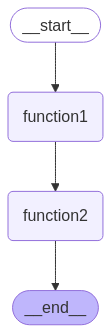

In [10]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print
    (e)

In [11]:
app1.invoke("hii this is ram")

'hii this i ram From the first functionthis is from 2nd function'

In [12]:
input = "hii this is Ram"

In [13]:
for output in app1.stream(input):
    for key,value in output.items():
        print(f'here is the output from {key}')
        print('-------')
        print(value)
        print('\n')

here is the output from function1
-------
hii this is Ram From the first function


here is the output from function2
-------
hii this is Ram From the first functionthis is from 2nd function




In [17]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [18]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash', google_api_key=os.getenv('GEMINI_KEY'))
embeddings= GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=os.getenv('GEMINI_KEY'))

In [19]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model='gemini-2.0-flash', google_api_key=os.getenv('GEMINI_KEY'))
    response= llm.invoke(input).content
    return response

In [20]:
def function2(input):
    upper =input.upper()
    return upper

In [22]:
from langgraph.graph import Graph
workflow1 = Graph()
workflow1.add_node('llm', function1)
workflow1.add_node('upper', function2)
workflow1.add_edge('llm', 'upper')

In [23]:
workflow1.set_entry_point('llm')
workflow1.set_finish_point('upper')

In [24]:
app2 = workflow1.compile()

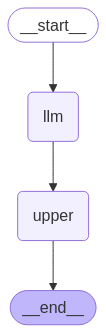

In [25]:
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print
    (e)

In [26]:
app2.invoke("who is the current prime Minister of India")

'THE CURRENT PRIME MINISTER OF INDIA IS NARENDRA MODI.'

In [27]:
app2.invoke("what is the use of Gen ai")

"GENERATIVE AI (GENAI) HAS A WIDE RANGE OF USES ACROSS VARIOUS INDUSTRIES AND APPLICATIONS. HERE'S A BREAKDOWN OF ITS KEY USES:\n\n**1. CONTENT CREATION:**\n\n*   **TEXT GENERATION:**\n    *   **WRITING ARTICLES, BLOG POSTS, AND SOCIAL MEDIA CONTENT:** GENAI CAN CREATE ORIGINAL TEXT, REWRITE EXISTING CONTENT, AND GENERATE SUMMARIES.\n    *   **GENERATING MARKETING COPY:**  IT CAN PRODUCE ENGAGING AD COPY, EMAIL CAMPAIGNS, AND PRODUCT DESCRIPTIONS.\n    *   **SCRIPTWRITING AND STORYTELLING:**  IT CAN HELP WRITERS BRAINSTORM IDEAS, DEVELOP CHARACTERS, AND WRITE DIALOGUES FOR MOVIES, TV SHOWS, AND VIDEO GAMES.\n    *   **CREATING CHATBOTS AND VIRTUAL ASSISTANTS:** GENAI POWERS CONVERSATIONAL AI, ENABLING MORE NATURAL AND ENGAGING INTERACTIONS.\n    *   **CODE GENERATION:**  IT CAN GENERATE CODE SNIPPETS, COMPLETE FUNCTIONS, AND EVEN BUILD ENTIRE APPLICATIONS BASED ON DESCRIPTIONS.\n*   **IMAGE GENERATION:**\n    *   **CREATING ARTWORK AND ILLUSTRATIONS:** TOOLS LIKE DALL-E, MIDJOURNEY, AN

In [28]:
def tokenCoounter(input):
    token = input.split()
    token_number = len(token)
    return token_number

In [37]:
workflow3 = Graph()
workflow3.add_node('llm', function1)
workflow3.add_node('uper', function2)
workflow3.add_node('tokencounter', tokenCoounter)
workflow3.add_edge('llm', 'uper')
# workflow3.add_edge('uper', 'tokencounter')
workflow3.set_entry_point('llm')
workflow3.set_finish_point('uper')
app3 = workflow3.compile()

In [38]:
app3.invoke("who is captain of Indian Cricket Team ")

'THE CURRENT CAPTAIN OF THE INDIAN CRICKET TEAM IS **ROHIT SHARMA**.'